# Credit Card Fraud Detection





**Dataset:** Anonymized credit card transactions labeled as fraudulent or genuine

**Source:** https://www.kaggle.com/mlg-ulb/creditcardfraud 

1. Using this credit card fraud dataset develop an algorithm to predict fraud. 
2. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud = pd.read_csv("C:/Users/Instructor/Dropbox/Data Science/Datasets/Creditcard fraud/creditcard.csv")

### Data Exploration

In [3]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud.shape

(284807, 31)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Preprocessing 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Scalling the 'Time' column
sc = StandardScaler()  
fraud['sca_Time'] = sc.fit_transform(fraud['Time'].values.reshape(-1, 1))
fraud = fraud.drop(['Time'],axis=1)

In [8]:
# Scalling the 'amount' column
sc = StandardScaler()  
fraud['sca_Amount'] = sc.fit_transform(fraud['Amount'].values.reshape(-1, 1))
fraud = fraud.drop(['Amount'],axis=1)

In [9]:
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,sca_Time,sca_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


In [10]:
fraud.shape

(284807, 31)

### Adjusting Columns 

In [11]:
# List of columns
fraud.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'sca_Time',
       'sca_Amount'],
      dtype='object')

In [12]:
# Moving "Class" column all the way to the end.
fraud = fraud[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','sca_Amount','sca_Time','Class']]

In [13]:
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,sca_Amount,sca_Time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


In [14]:
fraud.shape

(284807, 31)

### Counting Null Values 

In [15]:
# Counting null values
fraud.isnull().sum()

V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
sca_Amount    0
sca_Time      0
Class         0
dtype: int64

### Counting Classes 

In [16]:
# Value counts for the class column
# Classes appear imbalanced
fraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

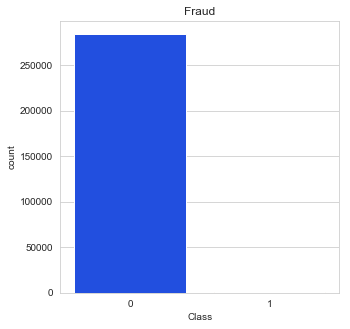

percentage fraudulent 0.17
percentage unfraudulent 99.83


<Figure size 432x288 with 0 Axes>

In [17]:
# fraudlculate percentage of safe vs. unsafe areas in fraud

sns.set_style("whitegrid")
fraud['Class'].value_counts()

plt.figure(figsize=(5,5))
plt.title("Fraud")
sns.countplot(x='Class', data=fraud, palette = 'bright')
plt.show()
plt.savefig('count')

unfraudulent = fraud[fraud['Class'] == 0].shape[0]
fraudulent = len(fraud[fraud['Class'] ==1 ])
pct_fraudulent = (fraudulent/(fraudulent + unfraudulent))*100
pct_unfraudulent = (unfraudulent/(fraudulent + unfraudulent))*100
print("percentage fraudulent", np.round(pct_fraudulent,2))
print("percentage unfraudulent", np.round(pct_unfraudulent,2))

### Handling Imbalanced Classes With Upsampling

In [18]:
from sklearn.utils import resample

In [19]:
# Separate majority and minority classes
fraud_majority = fraud[fraud.Class==0]

In [20]:
fraud_majority.shape

(284315, 31)

In [21]:
fraud_minority = fraud[fraud.Class==1]

In [22]:
fraud_minority.shape

(492, 31)

In [23]:
# Upsample minority class
fraud_minority_upsampled = resample(fraud_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 

In [24]:
fraud_minority_upsampled.shape

(284315, 31)

In [25]:
# Combine majority class with upsampled minority class
fraud_upsampled = pd.concat([fraud_majority, fraud_minority_upsampled])
 

In [26]:
fraud_upsampled.shape

(568630, 31)

In [27]:
# Display new class counts
fraud_upsampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

### Train Test Split

In [28]:
# Separate input features (X) and target variable (y)
X = fraud_upsampled.drop('Class', axis=1)
y = fraud_upsampled.Class

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### MLP Classifier

In [40]:
# MLP stands for Multilayer Perceptron
# max_iter are the epoch, 
# One epoch is a combination of one cycle of feed-forward and back propagation phase.
# By default the 'relu' activation function is used with 'adam' cost optimizer.
# However, you can change these functions using the activation and solver parameters, respectively.

from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(100, 500, 300), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel()) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 500, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
# Making predictions
y_pred = mlp.predict(X_test)

In [42]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [43]:
# Training score
mlp.score(X_train, y_train)

0.9999626294778678

In [44]:
# Testing score
mlp.score(X_test,y_test)

0.9998681040395336

In [45]:
from sklearn.metrics import accuracy_score

# View The Accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred)*100)

Accuracy score: 99.98681040395337


### MLP Classifier Metrics

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[56698,    15],
       [    0, 57013]], dtype=int64)

In [47]:
table = pd.crosstab(y_test, y_pred, margins=True)

In [48]:
table

col_0,0,1,All
Class,,,
0,56698,15,56713
1,0,57013,57013
All,56698,57028,113726


In [49]:
table_tI_errors = table.loc[0.0,1.0] / table.loc['All','All']
table_tII_errors = table.loc[1.0,0.0] / table.loc['All','All']

In [50]:
print((
    'Set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n').format(table_tI_errors, table_tII_errors))

Set accuracy:
Percent Type I errors: 0.00013189596046638412
Percent Type II errors: 0.0




In [51]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[56698    15]
 [    0 57013]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00     57013

   micro avg       1.00      1.00      1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



### Cross Validation

In [ ]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(mlp, X, y, cv=5)

In [ ]:
# scores = cross_val_score(mlp, X, y, cv=5)

In [ ]:
# print (scores.mean())

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight="balanced") 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [34]:
# Important features
imp_features = clf.feature_importances_
imp_feature_list = pd.DataFrame(X.columns)
imp_feature_list['Feature Importance'] = pd.Series(imp_features)
imp_feature_list = imp_feature_list.sort_values(by=['Feature Importance'],ascending=True).reset_index(drop=True)
imp_feature_list.head()

,0,Feature Importance
0,V2,0.002788
1,V24,0.003522
2,V28,0.003863
3,V15,0.005134
4,V23,0.005182


In [36]:
y_pred = clf.predict(X_test)

### Random Forest Metrics

In [37]:
table = pd.crosstab(y_test, y_pred, margins=True)
table

col_0,0,1,All
Class,,,
0,56703,10,56713
1,0,57013,57013
All,56703,57023,113726


In [38]:
table_tI_errors = table.loc[0.0,1.0] / table.loc['All','All']
table_tII_errors = table.loc[1.0,0.0] / table.loc['All','All']

print((
    'Set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n').format(table_tI_errors, table_tII_errors))

Set accuracy:
Percent Type I errors: 8.793064031092274e-05
Percent Type II errors: 0.0




In [39]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[56703    10]
 [    0 57013]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56713
           1       1.00      1.00      1.00     57013

   micro avg       1.00      1.00      1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

